## 3D Body Centered Cubic Crystal
The BCC model can be written by using previous equation

$E(\mathbf{k})=\epsilon-t_n\sum_{\boldsymbol{n}} e^{i \mathbf{k} \cdot \boldsymbol{n}} $

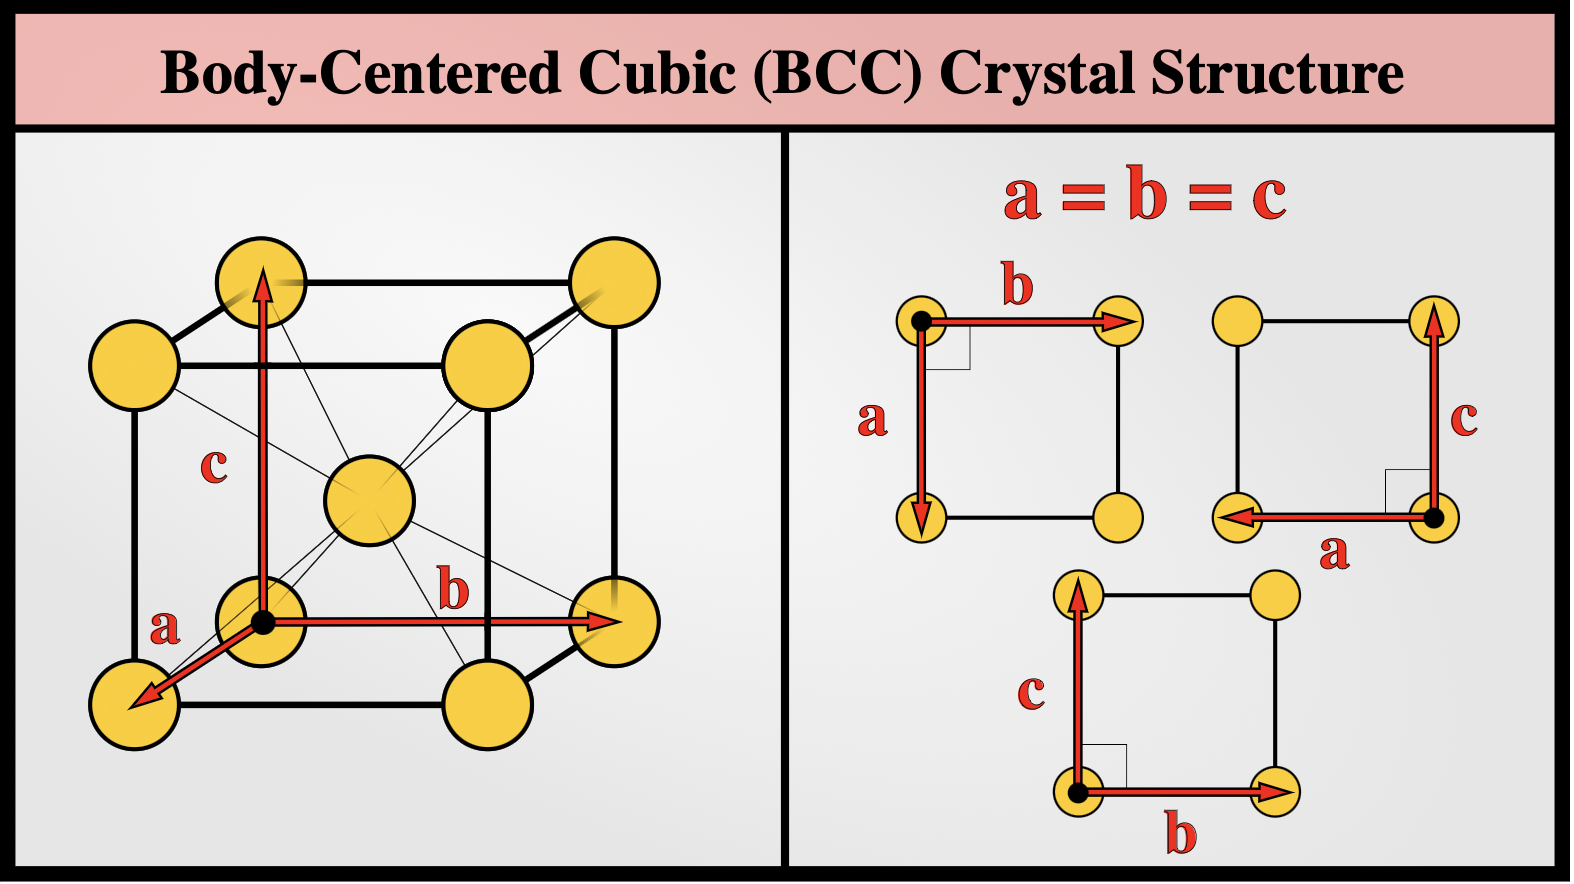

### The nearest neighbor vectors can be written as following [[Reading Material](https://arxiv.org/pdf/1004.2974.pdf)]

$a_{1}=\frac{a}{2}\left(\hat{x}+\hat{y}-{\hat{z}}\right)$
$a_{2}=\frac{a}{2}\left(-\hat{x}+\hat{y}+{\hat{z}}\right)$,
$a_{3}=\frac{a}{2}\left(\hat{x}-\hat{y}+{\hat{z}}\right) .$



### Using above vectors dispersion relation can be found

$E=\epsilon-8 t \cos \left(k_{x} a / 2\right) \cos \left(k_{y} a / 2\right) \cos \left(k_{z} a / 2\right)$

In [1]:
#Import Libraries

#Numerical manipulation
import numpy as np

#Plotting routine
import matplotlib.pyplot as plt

In [2]:
def bcc(ϵ,t,a,kx,ky,kz):
    energy = ϵ-8*np.cos(kx*a/2)*np.cos(ky*a/2)*np.cos(kz*a/2)
    return energy

In [3]:
#Define constant

# On-site energy 
ϵ = 1 #eV

# Hopping constant
t = 0.1 # eV

# Lattice spacing
a = 5  # Angstrom

# N number of unitcells
N = 80

# Reciprocal space length
g = 2*np.pi/a

### Energy profile of BCC can be plotted by using high symmetry points [[Reading Material]](https://arxiv.org/pdf/1004.2974.pdf)

In [4]:
bz = np.linspace(-g/2,g/2,N)

#Define k mesh
k_mesh = [[kx,ky,kz]  for kx in bz for ky in bz for kz in bz]

#Convert list into array
k_mesh = np.array(k_mesh)

#Define kx and ky
kx, ky, kz = k_mesh.T

In [5]:
energy = bcc(ϵ,t,a,kx,ky,kz)

In [6]:
#Data analysis library
import pandas as pd

#Fermi surface function
def fermi_surface(kx,ky,kz,energy,μ,δ):
    df = pd.DataFrame()
    df["kx"]=kx
    df["ky"]=ky
    df["kz"]=kz
    df["E"]=energy
    fs = df.query(f"{μ} - {δ} <= E <= {μ} + {δ}")
    return fs.kx,fs.ky,fs.kz

In [8]:
fs_kx, fs_ky, fs_kz = fermi_surface(kx,ky,kz,energy,μ=-2,δ=0.05)

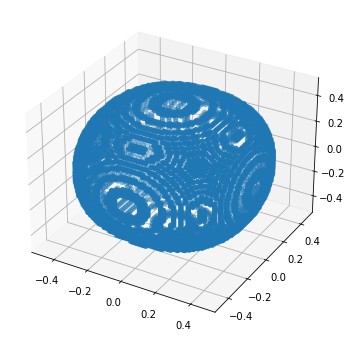

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(fs_kx, fs_ky, fs_kz)